# CS 536 : Decision Trees Assignment

In [16]:
#Importing libraries
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

In [2]:
#Initializing global variables
k = 4
m = 30
epsilon = 0.0000001

# Question 1

For a given value of k;m, (number of features, number of data points), write a function to generate a training
data set based on the above scheme.

In [3]:
#Function to generate dataset
def generate_dataframe(k=0, m=0):
    
    data = []
    
    #Internal function to generate rows
    def generate_vector(k=0):
        X = []
        Y = 0
        w_denom = sum([0.9**x for x in range(2,k+1)])

        for x in range(1, k+1):
            if x != 1:
                prev_X = X[-1]
                X.append(int(np.random.choice([prev_X, 1-prev_X], 1, p=[0.75, 0.25])))
            else: # when x == 1
                X.append(int(np.random.choice([1,0], 1, p=[0.5, 0.5])))

        if sum([ ((0.9**n)/w_denom)*X[n-1] for n in range(2,k+1) ]) >= 1/2:
            X.append(X[1])
        else:
            X.append(1 - X[1])

        return X
    
    for x in range(1, m+1):
        data.append(generate_vector(k))
        
    #Create header list
    headers = ['X'+str(x) for x in range(1,k+1)] + ['Y']
    
    dataframe = pd.DataFrame(data, columns=headers)
        
    return dataframe

Function to split feature based on Entropy

In [4]:
#Splitting Variable function
def splitting_variable(dataframe):
    """This function take a dataframe as input and returns apt splitting variable based on maximum information gain"""
    
    def information_gain(subset_df):
        """Extract the count when
               | x=0  | x=1
           y=0 | x0y0 | x1y0
           y=1 | x0y1 | x1y1
        """
        classes = list(subset_df)
        x0y0 = len(subset_df.loc[(subset_df[classes[0]] == 0) & (subset_df[classes[1]] == 0)])
        x0y1 = len(subset_df.loc[(subset_df[classes[0]] == 0) & (subset_df[classes[1]] == 1)])
        x1y0 = len(subset_df.loc[(subset_df[classes[0]] == 1) & (subset_df[classes[1]] == 0)])
        x1y1 = len(subset_df.loc[(subset_df[classes[0]] == 1) & (subset_df[classes[1]] == 1)])
                
        py0 = (x0y0 + x1y0) / (x0y0 + x1y0 + x0y1 + x1y1 + epsilon)
        py1 = (x0y1 + x1y1) / (x0y0 + x1y0 + x0y1 + x1y1 + epsilon)
        
        px0 = (x0y0 + x0y1) / (x0y0 + x1y0 + x0y1 + x1y1 + epsilon)
        px1 = (x1y0 + x1y1) / (x0y0 + x1y0 + x0y1 + x1y1 + epsilon)
                
        py0x0 = x0y0 / (x0y0 + x0y1 + epsilon)
        py1x0 = x0y1 / (x0y0 + x0y1 + epsilon)
        
        py0x1 = x1y0 / (x1y0 + x1y1 + epsilon)
        py1x1 = x1y1 / (x1y0 + x1y1 + epsilon)
              
        pyx0 = (-1 * py0x0 * np.log(py0x0 + epsilon)) + (-1 * py1x0 * np.log(py1x0 + epsilon))
        pyx1 = (-1 * py0x1 * np.log(py0x1 + epsilon)) + (-1 * py1x1 * np.log(py1x1 + epsilon))
                
        hy =  (-1 * py0 * np.log(py0 + epsilon)) + (-1 * py1 * np.log(py1 + epsilon))
        hyx = (px1 * pyx1) + (px0 * pyx0)
                
        igx = hy - hyx
                
        return igx
    
    #Fetch information gain for every X
    columns = list(dataframe)
    ig = [information_gain(dataframe[[x, 'Y']]) for x in columns[:-1]]
    split_on_variable = columns[np.argmax(ig)]
    
    return split_on_variable #splitting variable

Function to split feature based on Chi-Squared test 

In [5]:
#Splitting function based on Chi-Squared Test
def chi_squared_split(dataframe):
    
    def chi_squared(subset_df):
        """Extract the count when
               | x=0  | x=1
           y=0 | x0y0 | x1y0
           y=1 | x0y1 | x1y1
        """
        classes = list(subset_df)
        x0y0 = len(subset_df.loc[(subset_df[classes[0]] == 0) & (subset_df[classes[1]] == 0)])
        x0y1 = len(subset_df.loc[(subset_df[classes[0]] == 0) & (subset_df[classes[1]] == 1)])
        x1y0 = len(subset_df.loc[(subset_df[classes[0]] == 1) & (subset_df[classes[1]] == 0)])
        x1y1 = len(subset_df.loc[(subset_df[classes[0]] == 1) & (subset_df[classes[1]] == 1)])
        
        total_count = x0y0 + x0y1 + x1y0 + x1y1
        
        py0 = (x0y0 + x1y0) / (total_count + epsilon)
        py1 = (x0y1 + x1y1) / (total_count + epsilon)
        
        px0 = (x0y0 + x0y1) / (total_count + epsilon)
        px1 = (x1y0 + x1y1) / (total_count + epsilon)
        
        t_x0y0 = (((px0 * py0 * total_count) - x0y0) ** 2)/((px0 * py0 * total_count) + epsilon) 
        t_x0y1 = (((px0 * py1 * total_count) - x0y1) ** 2)/((px0 * py1 * total_count) + epsilon)
        t_x1y0 = (((px1 * py0 * total_count) - x1y0) ** 2)/((px1 * py0 * total_count) + epsilon)
        t_x1y1 = (((px1 * py1 * total_count) - x1y1) ** 2)/((px1 * py1 * total_count) + epsilon)
        
        T = t_x0y0 + t_x0y1 + t_x1y0 + t_x1y1
        
        return T
        
    #Fetch information gain for every X
    columns = list(dataframe)
    chi = [chi_squared(dataframe[[x, 'Y']]) for x in columns[:-1]]

    split_on_variable = columns[np.argmax(chi)]
    
    return split_on_variable #splitting variable

# Question 2

Given a data set, write a function to t a decision tree to that data based on splitting the variables by maximizing
the information gain. Additionally, return the training error of this tree on the data set, errtrain( ^ f).

In [6]:
#generate decision tree
def generate_decision_tree(dataframe, tree=None):
    
    #fetch the features X1, X2...Xn
    classes = list(dataframe)[:-1]
    
    #get the node to split on
    split_var = splitting_variable(dataframe)
    
    #initialize tree in form of dictionary if not already initialized
    if tree is None:
        tree = {}
        tree[split_var] = {}
    
    #Explore when split_var is 0 & 1
    for value in (0,1):
        split_dataframe = dataframe[dataframe[split_var] == value]
        class_value, value_count = np.unique(split_dataframe['Y'], return_counts=True)
        
        #check if split_dataframe has only single class to consider, if not then explore further
        if len(value_count) == 1: 
            tree[split_var][value] = class_value[0]
        else:
            #recursively call the tree
            tree[split_var][value] = generate_decision_tree(split_dataframe)
            
    #return the generated tree
    return tree        

In [7]:
#generate decision tree using chi-squared
def generate_decision_tree_chi(dataframe, tree=None):
    
    #fetch the features X1, X2...Xn
    classes = list(dataframe)[:-1]
    
    #get the node to split on
    split_var = chi_squared_split(dataframe)
    
    #initialize tree in form of dictionary if not already initialized
    if tree is None:
        tree = {}
        tree[split_var] = {}
    
    #Explore when split_var is 0 & 1
    for value in (0,1):
        split_dataframe = dataframe[dataframe[split_var] == value]
        class_value, value_count = np.unique(split_dataframe['Y'], return_counts=True)
        
        #check if split_dataframe has only single class to consider, if not then explore further
        if len(value_count) == 1: 
            tree[split_var][value] = class_value[0]
        else:
            #recursively call the tree
            tree[split_var][value] = generate_decision_tree_chi(split_dataframe)
            
    #return the generated tree
    return tree        

In [8]:
#predict function using the decision tree
def predict(X_dataframe, tree):
    for value in tree.keys():
        sub_tree = int(X_dataframe[value])
        tree = tree[value][sub_tree]
        
        if type(tree) is not dict:
            return tree
        else:
            return predict(X_dataframe, tree)

In [9]:
#Create function for computing ERR_train
def compute_ERR(dataframe, tree):
    
    err = 0
    length = len(dataframe)
    
    for row_index in range(0, length):
        row = dataframe[row_index: row_index+1]
        
        if int(row['Y']) != predict(row, tree):
            err += 1
            
    return err/length

# Question 3

For k = 4 and m = 30, generate data and t a decision tree to it. Does the ordering of the variables in the
decision tree make sense, based on the function that denes Y ? Why or why not? Draw the tree.

In [10]:
k = 4
m = 30

#Generate dataframe based on above parameters
df = generate_dataframe(k, m)
print('Data Set:\n')
print(df,'\n')

#Fit decision tree
tree = generate_decision_tree(df)
print('\nDecision Tree: \n')
pprint(tree)
print('\n')

#Compute Training Error
ERR_train = compute_ERR(df, tree)
print('Train Error:')
print(ERR_train,'\n')

Data Set:

    X1  X2  X3  X4  Y
0    0   0   0   0  1
1    0   0   1   1  0
2    0   1   1   1  1
3    0   0   0   1  1
4    0   0   0   0  1
5    0   1   1   1  1
6    0   0   1   1  0
7    1   1   0   0  0
8    1   0   0   0  1
9    0   0   0   1  1
10   0   0   0   0  1
11   1   1   1   1  1
12   0   1   1   0  1
13   0   0   1   1  0
14   1   0   1   0  1
15   0   0   0   1  1
16   1   1   1   1  1
17   0   1   1   1  1
18   0   0   0   0  1
19   0   0   0   0  1
20   0   1   1   1  1
21   1   1   1   1  1
22   0   0   0   0  1
23   0   0   0   1  1
24   0   0   0   0  1
25   0   0   1   1  0
26   0   0   0   0  1
27   0   1   1   0  1
28   1   1   1   1  1
29   1   1   1   0  1 


Decision Tree: 

{'X3': {0: {'X2': {0: 1, 1: 0}}, 1: {'X2': {0: {'X1': {0: 0, 1: 1}}, 1: 1}}}}


Train Error:
0.0 



![alt text](decision.png "Decision Tree")

The order of the variables in the decision tree makes sense. Its justified by looking at the Training Error of generated Decision Tree, which is 0. Meaning the decision tree models our training data perfectly.

# Question 4

Write a function that takes a decision tree and estimates its typical error on this data err( ^ f); i.e., generate a
lot of data according to the above scheme, and nd the average error rate of this tree over that data.

In [11]:
k = 4
m = 10

#Generate dataframe based on above parameters
df = generate_dataframe(k, m)
print('Data Set:\n')
print(df,'\n')

#Compute typical error on above created data and tree drawn above
ERR = compute_ERR(df, tree)
print('Average Error:')
print(ERR,'\n')

Data Set:

   X1  X2  X3  X4  Y
0   1   1   1   1  1
1   0   0   0   0  1
2   1   1   1   1  1
3   1   0   1   1  0
4   1   1   0   0  0
5   1   0   0   0  1
6   0   0   0   0  1
7   0   0   0   0  1
8   1   1   1   1  1
9   0   0   0   0  1 

Average Error:
0.1 



# Question 5

For k = 10, estimate the value of jerrtrain( ^ f) 􀀀 err( ^ f)j for a given m by repeatedly generating data sets, tting
trees to those data sets, and estimating the true and training error. Do this for multiple m, and graph this
dierence as a function of m. What can you say about the marginal value of additional training data?

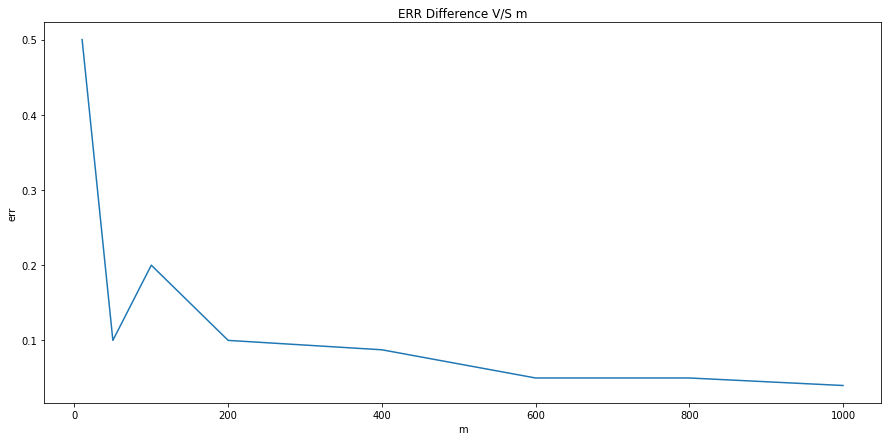

In [17]:
k = 10
m = [10, 50, 100, 200, 400, 600, 800, 1000]
split_ratio = 0.8
err_diff = {}

for values in m:
    df = generate_dataframe(k, values)
    train_df = df.iloc[:int(split_ratio*values)]
    test_df = df.iloc[int(split_ratio*values):]
    
    tree = generate_decision_tree(train_df)
    
    ERR_train = compute_ERR(train_df, tree)
    ERR = compute_ERR(test_df, tree)
    
    err_diff[values] = np.absolute(ERR_train - ERR)
    
err_list = sorted(err_diff.items())
x,y = zip(*err_list)

plt.plot(x,y)
plt.title('ERR Difference V/S m')
plt.xlabel('m')
plt.ylabel('err')
plt.show()

What can you say about the marginal value of additional training data?

As you increase the training data, accuracy of the model increases.

# Question 6

Design an alternative metric for splitting the data, not based on information content / information gain. Repeat
the computation from (5) above for your metric, and compare the performance of your trees vs the ID3 trees.

I have used Chi-Squared test to check the weight of dependence of feature variables with Y and split based on the most dependent feature first, so on and so forth.

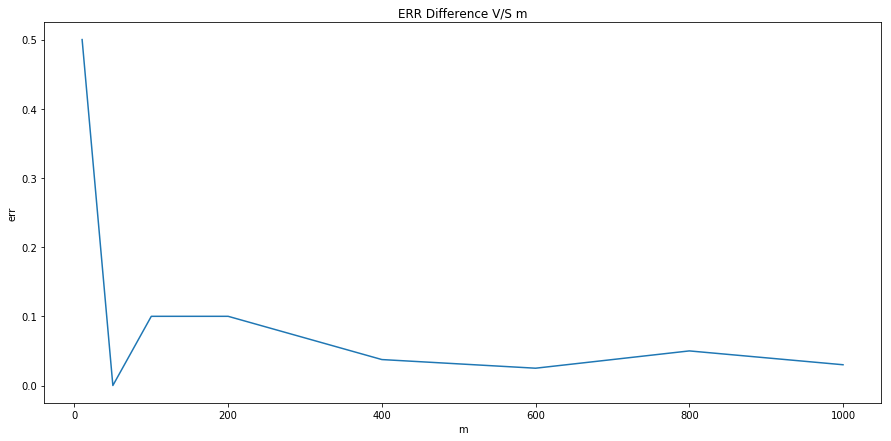

In [22]:
#Question 6
k = 10
m = [10, 50, 100, 200, 400, 600, 800, 1000]

split_ratio = 0.8
err_diff = {}

for values in m:
    df = generate_dataframe(k, values)
    train_df = df.iloc[:int(split_ratio*values)]
    test_df = df.iloc[int(split_ratio*values):]
    
    tree = generate_decision_tree_chi(train_df)
    
    ERR_train = compute_ERR(train_df, tree)
    ERR = compute_ERR(test_df, tree)
    
    err_diff[values] = np.absolute(ERR_train - ERR)
    
err_list = sorted(err_diff.items())
x,y = zip(*err_list)

plt.plot(x,y)
plt.title('ERR Difference V/S m')
plt.xlabel('m')
plt.ylabel('err')
plt.show()

# Conclusion drawn between ID3 & Chi-Squared Test

Chi-Squared test has a steep curve compared to ID3. Which means that Chi-Squared gives better perfomance with lesser data. Also it can be inferred that Chi-Squared test results in faster computation.